# 0. TO DO

* Change the path with os library to create a relative file path for the dataset (it is absolute atm)
* Move custom functions to a separate file 
* Comment on functions + test them
* Read Python documentation on modularization best practices
* Check if logic tbd inside jupyter or final report
* Recheck the comments to use corect terminology according to the book

# 0. Functions to be modularized

In [5]:
# A function that allows to check if the data points data types corresponds to their columns' data type
def dtype_per_column(df):
    for col in df.columns:
        print(f"{col}:")
        dtype_count = {}

        for i in df[col]:
            dtype_name = type(i).__name__
            if dtype_name in dtype_count:
                dtype_count[dtype_name] = dtype_count[dtype_name] + 1
            else:
                dtype_count[dtype_name] = 1

        for dtype_name in dtype_count:
            print(f"{dtype_name}: {str(dtype_count[dtype_name])}")
            print("\n")

# A function that allows to generate and compare descriptive statistics for a specific column across multiple dataframes
def compare_statistics_per_col(dataframes, dataframes_names, column):
    descriptive_statistics = []
    
    for df in dataframes:
        statistics = df[column].describe()
        descriptive_statistics.append(statistics)
    
    result = pd.concat(descriptive_statistics, axis=1, keys=dataframes_names)

    print("---" * 10)
    print(f"Comparison of descriptive statistics for \x1B[4m{column}\x1B[0m:")
    print("---" * 10)
    return result

# A function that allows to generate and compare histograms for a specific column across multiple dataframes
def compare_histograms_per_col(dataframes, dataframes_names, column):

    n = len(dataframes)
    fig, axes = plt.subplots(ncols=n, nrows=1, figsize=(5 * n, 4))
    
    for i in range(n):
        ax = axes[i]
        df = dataframes[i]
        name = dataframes_names[i]
        sns.histplot(data=df, x=column, ax=ax, kde=True)
        ax.set_title(f"{name}")
    
    print("---" * 10)
    print(f"Comparison of data distributions for \x1B[4m{column}\x1B[0m:")
    print("---" * 10)
    
    plt.tight_layout()
    plt.show()


# A function that allows to check of the top 10 most frequent values per column in a dataframe
def top_10_frequent_values(df):
    for col in df:
        print(f"Top 10 most frequent values for \x1B[4m{col}\x1B[0m::")
        print(df[col].value_counts().head(10))
        print("\n")

# A function that allow to check of duplicated data points per column
def duplicate_cells_per_column(df):
    for col in df.columns:
        print(f"{col}: {df[col].duplicated().sum()}")



---
# **1. LIBRARIES & DATA IMPORT**
---

In [2]:
# Libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Original df import
df = pd.read_csv(r"C:\Users\ernes\Desktop\GITHUB\diabetes_prediction\data_analysis\assets\data\TAIPEI_diabetes.csv")

In [4]:
# Creation of a deep copy of the original df
raw_df = df.copy()

---
# **2. INITIAL DATA OVERVIEW**
---

**This part is dedicated to get a general understanding of the data available on hand and identification of the following:**
* general shape of the dataframe;
* features available for the prediction of our target variable;
* detecting NULL data points;
* columns' data types;
* check if the data point respects the data type of the column;
* duplicate values.

In [6]:
# Df sizing
df.shape

(15000, 10)

In [42]:
# Quick look at the first values of the df on hand
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [43]:
# Quick look at the last values of the df on hand
df.tail(10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
14990,1220763,5,169,83,31,60,49.004793,0.187397,53,1
14991,1603490,0,114,53,34,40,44.760534,0.143487,23,0
14992,1202654,3,48,60,24,81,29.417154,0.159605,42,1
14993,1165919,1,128,59,21,182,19.766514,0.167280,53,0
14994,1453189,0,72,99,32,32,20.932808,0.545038,22,0
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0
14999,1386396,3,114,65,47,512,36.215437,0.147363,34,1


In [44]:
# First check of the NULL data points inside the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [45]:
# Second check of the NULL values
df.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [46]:
# Check of the data types of data points per column
dtype_per_column(df)

PatientID:
int: 15000


Pregnancies:
int: 15000


PlasmaGlucose:
int: 15000


DiastolicBloodPressure:
int: 15000


TricepsThickness:
int: 15000


SerumInsulin:
int: 15000


BMI:
float: 15000


DiabetesPedigree:
float: 15000


Age:
int: 15000


Diabetic:
int: 15000




In [47]:
# Check of the duplicated rows
duplicate_rows = df.duplicated().sum()

print(f"Total duplicated rows: {duplicate_rows}.")

Total duplicated rows: 0.


In [48]:
# Check of duplicated data points per column
duplicate_cells_per_column(df)

PatientID: 105
Pregnancies: 14985
PlasmaGlucose: 14851
DiastolicBloodPressure: 14910
TricepsThickness: 14931
SerumInsulin: 14337
BMI: 0
DiabetesPedigree: 1
Age: 14944
Diabetic: 14998


### **INITIAL DATA OVERVIEW OBSERVATIONS**

* The studied dataset consists of 15 000 records in total.

* It has 10 columns, with all of them being of a numerical data type (8x int64 and 2x float64).

* The features are of numeric nature, both continuous and discrete. The predictor is a categorical, binary data type.

* All the data points match the expected data types for their respective columns. Based on the preliminary notes documentation, these data types seem correct, given the nature of the features. Therefore, there is no need for type casting in order to normalize the data types.

* The dataset contains no NULL values or duplicate rows, allowing us to explore it further during the EDA phase, without additional manipulations at this stage.

* 2/3 of the dataset contains non-diabetic patients records (predictor variable), which may lead to a class imbalance, where a machine learning model is better at predicting the non-diabetic patients, rather than the diabetic ones. An approach that might be helpful in this case would be resampling.

* The target variable being of binary type will be encoded during the feature engineering phase.

* An interesting observation is that 105 PatientID values are duplicated, suggesting that some patients may have undergone multiple check-ups.

---
# **3. EXPLORATORY DATA ANALYSIS (EDA)**
---

## **3.1 Closer look at the repeated PatientID**

**This part is dedicated to:**
* Take a closer look at the repeated PatientID to comprehend if some patient underwent multiple medial checkups.
* Decide what to do with the repeated PatientID values : keep them, reject them or adjust them.

In [49]:
# Statistical description of the original df
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [8]:
# Creation of a df with only repeated patients, ordered by the PatientID and the original df index
df_repeated_patients = df_duplicates = df[df.duplicated(subset="PatientID", keep=False)].sort_values(by="PatientID", ascending=True, kind="mergesort")
df_repeated_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 3350 to 10750
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               210 non-null    int64  
 1   Pregnancies             210 non-null    int64  
 2   PlasmaGlucose           210 non-null    int64  
 3   DiastolicBloodPressure  210 non-null    int64  
 4   TricepsThickness        210 non-null    int64  
 5   SerumInsulin            210 non-null    int64  
 6   BMI                     210 non-null    float64
 7   DiabetesPedigree        210 non-null    float64
 8   Age                     210 non-null    int64  
 9   Diabetic                210 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 18.0 KB


In [9]:
# Creation of an additional column with the number of occurences for doubled patients, incremented according to the original df index
df_repeated_patients["Occurence"] = df_repeated_patients.groupby("PatientID").cumcount() + 1

In [10]:
# Creation of a df without repeated patients
df_removed_duplicates = df[~df["PatientID"].isin(df_repeated_patients["PatientID"])]
df_removed_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14790 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               14790 non-null  int64  
 1   Pregnancies             14790 non-null  int64  
 2   PlasmaGlucose           14790 non-null  int64  
 3   DiastolicBloodPressure  14790 non-null  int64  
 4   TricepsThickness        14790 non-null  int64  
 5   SerumInsulin            14790 non-null  int64  
 6   BMI                     14790 non-null  float64
 7   DiabetesPedigree        14790 non-null  float64
 8   Age                     14790 non-null  int64  
 9   Diabetic                14790 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.2 MB


In [11]:
# Detailed overview of the repeated patients, sorted by age
print(df_repeated_patients.sort_values(by="Age").to_string())


       PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  Occurence
3350     1015338           10            104                      59                57           259  29.268008          0.820120   21         1          1
12419    1054588            3             50                      81                26           287  39.345367          0.757438   21         1          2
6772     1063170           10             73                      55                11           338  19.339531          0.178850   21         0          2
13975    1079564            0            152                      51                10            40  38.914128          0.193839   21         0          2
6879     1146035            1             50                      87                31            27  20.646017          0.473168   21         0          1
14603    1170024            9            150                    

In [50]:
# Statistical description of the repeated patients
df_repeated_patients.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Occurence
count,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,1.515977e+06,3.080952,107.847619,69.547619,30.900000,131.357143,30.563109,0.388672,29.790476,0.333333,1.500000
std,2.788603e+05,3.360069,30.199744,16.858548,14.299078,128.511132,9.354205,0.346752,11.290590,0.472531,0.501195
min,1.015338e+06,0.000000,47.000000,24.000000,7.000000,14.000000,18.291302,0.079090,21.000000,0.000000,1.000000
25%,1.267578e+06,0.000000,87.000000,56.250000,19.000000,35.000000,21.389471,0.146010,22.000000,0.000000,1.000000
50%,1.545001e+06,1.500000,105.000000,67.000000,32.000000,78.500000,30.896698,0.200668,24.000000,0.000000,1.500000
75%,1.735297e+06,6.000000,127.750000,84.000000,43.750000,188.000000,38.583220,0.640889,35.750000,1.000000,2.000000
max,1.998870e+06,14.000000,185.000000,113.000000,73.000000,682.000000,51.326693,2.296062,71.000000,1.000000,2.000000


In [63]:
# Quick look at the top 10 most occuring values per column: repeated patients df
top_10_frequent_values(df_repeated_patients)

Top 10 most frequent values for PatientID::
PatientID
1015338    2
1033352    2
1054588    2
1063170    2
1079564    2
1099669    2
1104393    2
1109455    2
1127499    2
1134543    2
Name: count, dtype: int64


Top 10 most frequent values for Pregnancies::
Pregnancies
0    68
1    37
7    18
3    17
2    14
6    14
8    10
5    10
9     8
4     5
Name: count, dtype: int64


Top 10 most frequent values for PlasmaGlucose::
PlasmaGlucose
92     6
96     6
97     6
144    5
72     5
126    5
118    5
106    5
104    5
121    4
Name: count, dtype: int64


Top 10 most frequent values for DiastolicBloodPressure::
DiastolicBloodPressure
80    8
66    7
59    7
87    6
62    6
81    6
55    6
65    6
67    6
64    6
Name: count, dtype: int64


Top 10 most frequent values for TricepsThickness::
TricepsThickness
44    13
31    13
35    13
45    10
32     9
12     8
15     7
10     7
22     6
46     6
Name: count, dtype: int64


Top 10 most frequent values for SerumInsulin::
SerumInsulin
35    5


# TODO : 
* Age vs pregnancies graph
* Biggest age gap projection
* determine under-represented groups 

**Repeated PatientID observations**

* A closer examination of repeated patient data rejects the initial hypothesis that the same individual might have undergone a second check-up.

* According to preliminary notes, data collection occurred in two periods: 2018–2020 and 2021–2022, spanning exactly five years. However, for some repeated patients, the age gap far exceeds this threshold. For instance, Patient's 1033352 first record lists their age as 60, while the second records them as 38.

* Additionally, some patients show inconsistencies in pregnancy history despite their young age. For example, Patient 1015338 is recorded as having had 10 pregnancies at age 21, but in a subsequent record at age 22, the number of pregnancies is 0.

#### **Repeated PatientID data implications**:
* Because of the detected data anomalies, we will not keep the repeated patients records in their original form before passing it to the machine learning models.

* To determine the final treatment approach, we will check which features are most important for our prediction, and check if repeated patients belong to underrepresented groups in the EDA phase. If they do, we will standardize their values; otherwise, we will drop their records during feature engineering phase.



---

## **3.1 Univariate & bivariate analysis with the target**

**This part is dedicated to:**
* Explore the data more in detail, by examining each column individually and their relationship to the target value;
* Understand if the data on hand is better at predicting the diabetic or non-diabetic outcome.

In [61]:
# Division of the dataset into diabetic and non-diabetic dataframes
df_non_diabetic = df[df["Diabetic"] == 0]
df_diabetic = df[df["Diabetic"] == 1]

In [ ]:
# Quick look at the top 10 most occuring values per column : original df
top_10_frequent_values(df)

Top 10 most frequent values for PatientID::
PatientID
1321191    2
1772038    2
1693955    2
1951340    2
1104393    2
1015338    2
1460338    2
1459465    2
1733432    2
1567493    2
Name: count, dtype: int64


Top 10 most frequent values for Pregnancies::
Pregnancies
0    4377
1    2864
3    1219
6    1070
2     939
7     895
9     881
5     687
4     675
8     645
Name: count, dtype: int64


Top 10 most frequent values for PlasmaGlucose::
PlasmaGlucose
97     263
96     240
118    209
95     199
107    199
119    196
93     195
85     194
117    193
114    191
Name: count, dtype: int64


Top 10 most frequent values for DiastolicBloodPressure::
DiastolicBloodPressure
81    445
79    416
78    406
83    404
80    401
86    400
84    394
82    385
60    358
85    354
Name: count, dtype: int64


Top 10 most frequent values for TricepsThickness::
TricepsThickness
11    657
9     593
10    572
45    521
34    517
7     511
8     493
44    488
31    481
35    481
Name: count, dtype: int64


---
### **Pregnancies focus**


In [ ]:
# Pregnancies statistical data
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "Pregnancies")

------------------------------
Comparison of descriptive statistics for Pregnancies:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,3.224533,2.247900,5.177800
std,3.391020,3.130531,3.029063
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,2.000000,1.000000,5.000000
75%,6.000000,3.000000,8.000000
max,14.000000,11.000000,14.000000


------------------------------
Comparison of data distributions for Pregnancies:
------------------------------


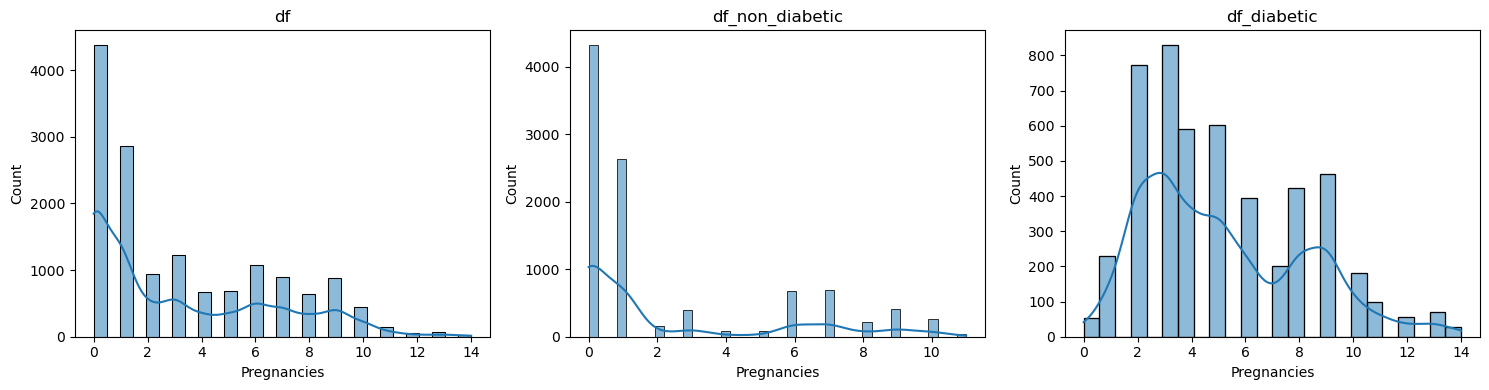

In [ ]:
# Pregnancies data distributions
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "Pregnancies")

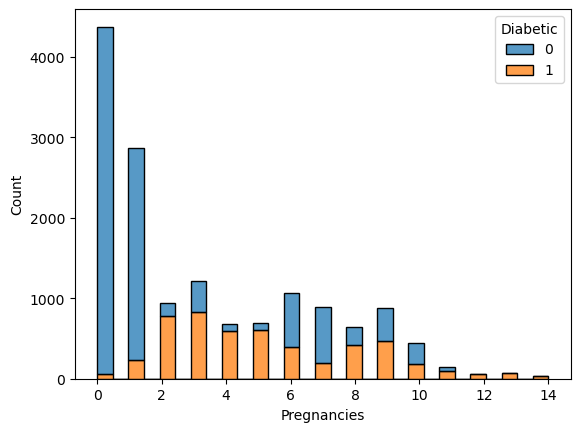

In [71]:
# Comparison of diabetic outcome vs. number of pregnancies
sns.histplot(data=df, x="Pregnancies", hue="Diabetic", multiple="stack")
plt.show()

#### **Pregnancies data observations**:

* right-skewed data distribution ; in all three histograms (df, df_non_diabetic, df_diabetic) the distribution extends to the right;
* 75% of all values inside the range between 0 and 6, whereas the overall range is 0 to 14;
* diabetic group has a higher average pregnancy count (~5.2 vs. ~2.2 for non-diabetic);
* diabetic group: 50% of the sample has had ≤ 5 pregnancies (vs. 1 for  non-diabetics), and 75% has had ≤8 pregnancies (vs. 3 for non-diabetics);

#### **Pregnancies data implications**: 
* diabetes risk increases as the number of pregnancies grows.

---
### **Plasma Glucose focus**

In [64]:
# Plasma glucose statistical data
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "PlasmaGlucose")

------------------------------
Comparison of descriptive statistics for PlasmaGlucose:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,107.856867,104.962200,113.646200
std,31.981975,32.076304,30.994844
min,44.000000,44.000000,44.000000
25%,84.000000,80.000000,98.000000
50%,104.000000,96.000000,108.000000
75%,129.000000,128.000000,131.250000
max,192.000000,189.000000,192.000000


------------------------------
Comparison of data distributions for PlasmaGlucose:
------------------------------


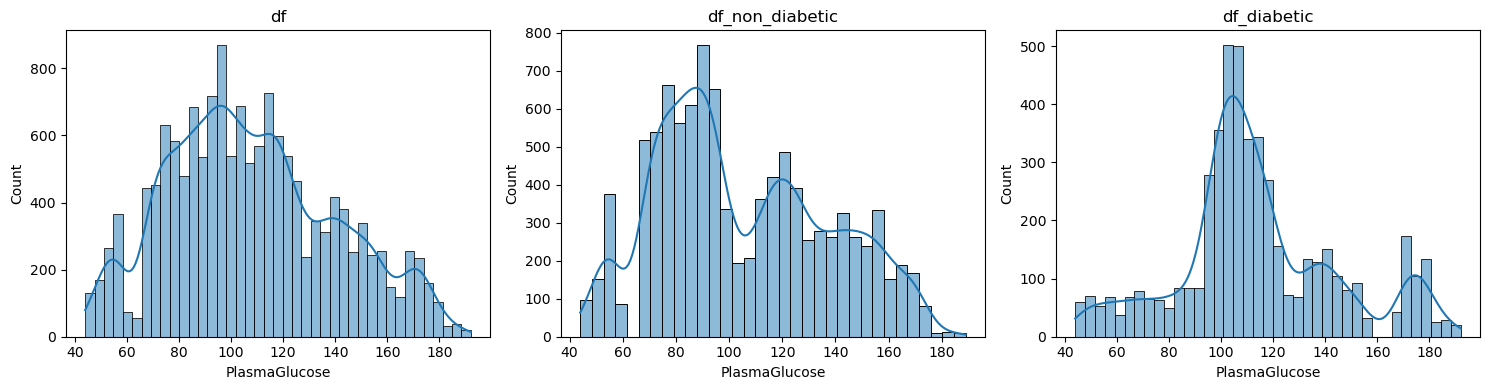

In [65]:
# Plasma glucose data distributions
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "PlasmaGlucose")

<Axes: xlabel='PlasmaGlucose', ylabel='Density'>

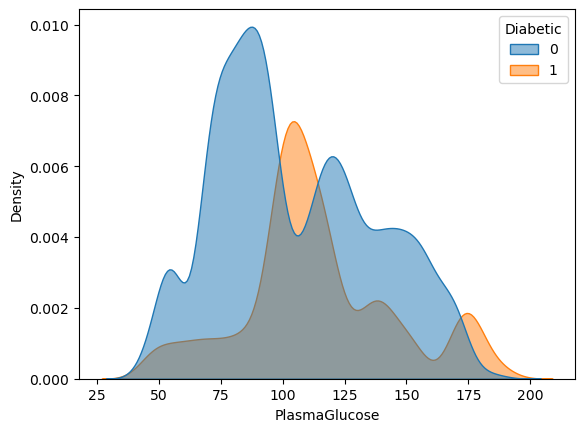

In [ ]:
# Comparison of diabetic outcome vs. levels of plasma glucose
sns.kdeplot(data=df, x="PlasmaGlucose", hue="Diabetic", fill=True, alpha=0.5)

#### **Plasma Glucose data observations**:
* slightly right-skewed for the full sample and non-diabetic group, roughly symetric for the diabetic group;
* 75% of all values inside the range between 44 and 129, whereas the overall range is 24 to 117;
* diabetic group has a slightly higher average diastolic blood pressure level (~73.4 vs. ~70.1  for non-diabetic);
* diabetic group: 50% of the sample has diastolic blood pressure level ≤ 69 (vs. 74 for non-diabetics), and 75% of both diabetic and non-diabetic groups is ≤ 85;
* 4th quartile trend is reversed, where non-diabetic patients have lower diastolic blood pressure level (109 vs. 117 for non-diabetics).

#### **Plasma Glucose data implications**: 
* **Diabetic group has a slightly higher Plasma Glucose levels** than non-diabetic group (~105 vs. ~113.7).


---
### **Diastolic Blood Pressure focus**

In [66]:
# Diastolic blood pressure statistical data
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "DiastolicBloodPressure")

------------------------------
Comparison of descriptive statistics for DiastolicBloodPressure:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,71.220667,70.138700,73.384600
std,16.758716,17.704926,14.445041
min,24.000000,24.000000,24.000000
25%,58.000000,55.000000,63.000000
50%,72.000000,69.000000,74.000000
75%,85.000000,85.000000,85.000000
max,117.000000,117.000000,109.000000


------------------------------
Comparison of data distributions for DiastolicBloodPressure:
------------------------------


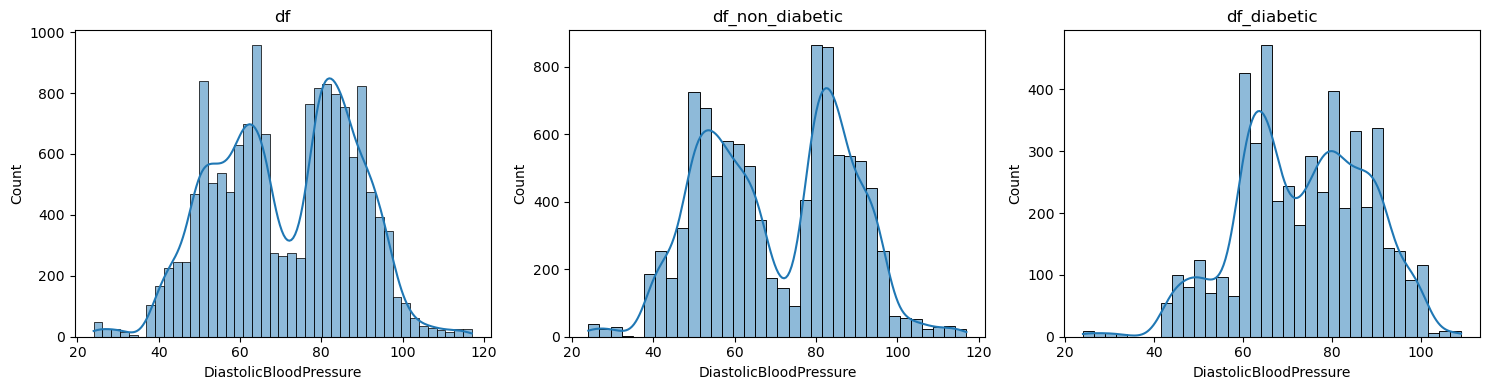

In [67]:
# Diastolic blood pressure data distributions
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "DiastolicBloodPressure")

<Axes: xlabel='DiastolicBloodPressure', ylabel='Density'>

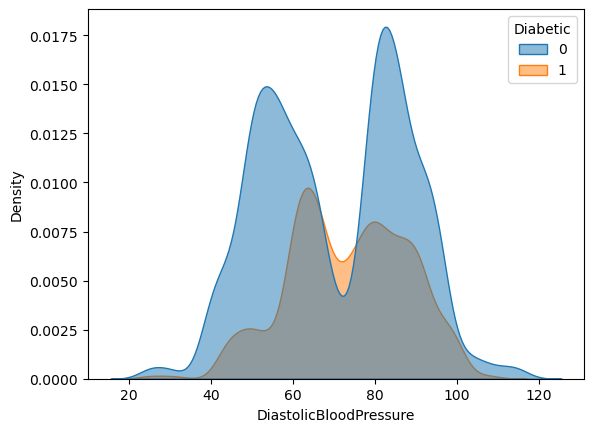

In [68]:
# Comparison of diabetic outcome vs. levels of diastolic blood pressure
sns.kdeplot(data=df, x="DiastolicBloodPressure", hue="Diabetic", fill=True, alpha=0.5)

#### **Diastolic Blood Pressure data observations**:
* roughly bimodal data distribution across 3 data frames;
* 75% of all values inside the range between 24 and 85, whereas the overall range is 24 to 117;
* diabetic group has a slightly higher average diastolic blood pressure level (~73.4 vs. ~70.1  for non-diabetic);
* diabetic group: 50% of the sample has diastolic blood pressure level ≤ 69 (vs. 74 for non-diabetics), and 75% of both diabetic and non-diabetic groups is ≤ 85;
* 4th quartile trend is reversed, where non-diabetic patients have lower diastolic blood pressure level (109 vs. 117 for non_diabetics).

#### **Diastolic Blood Pressure data implications**: 
* **Higher Diastolic Blood Pressure levels might have a slight impact** on the diabetic outcome.

---
### **Triceps Thickness focus**

In [69]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "TricepsThickness")

------------------------------
Comparison of descriptive statistics for TricepsThickness:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,28.814000,27.244400,31.953200
std,14.555716,13.906287,15.300269
min,7.000000,7.000000,7.000000
25%,15.000000,12.000000,21.000000
50%,31.000000,31.000000,29.000000
75%,41.000000,39.000000,44.000000
max,93.000000,57.000000,93.000000


------------------------------
Comparison of data distributions for TricepsThickness:
------------------------------


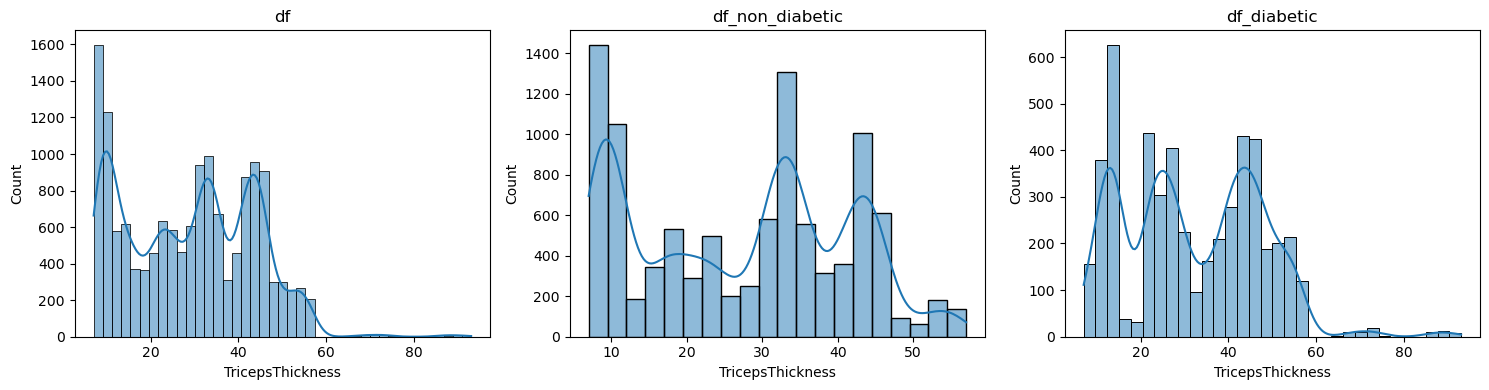

In [70]:
# Triceps thickness data distributions
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "TricepsThickness")

<Axes: xlabel='TricepsThickness', ylabel='Density'>

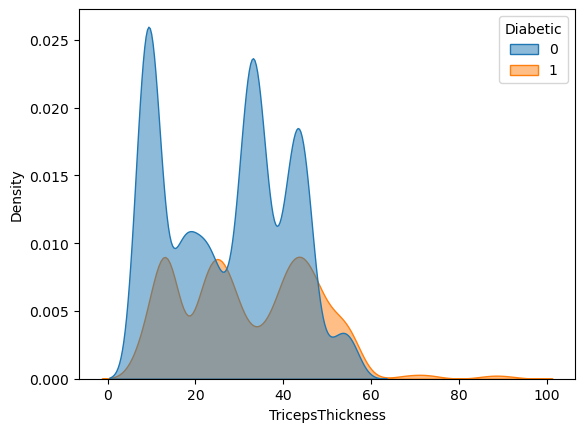

In [71]:
# Comparison of diabetic outcome vs. triceps thickness
sns.kdeplot(data=df, x="TricepsThickness", hue="Diabetic", fill=True, alpha=0.5)

#### **Triceps Thickness data observations**:


#### **Triceps Thickness data implications**: 


---
### **Serum Insulin focus**

In [ ]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "SerumInsulin")

------------------------------
Comparison of descriptive statistics for SerumInsulin:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,137.852133,114.576500,184.403400
std,133.068252,116.834954,150.245929
min,14.000000,14.000000,14.000000
25%,39.000000,32.000000,70.000000
50%,83.000000,52.000000,153.000000
75%,195.000000,174.000000,257.000000
max,799.000000,707.000000,799.000000


------------------------------
Comparison of data distributions for SerumInsulin:
------------------------------


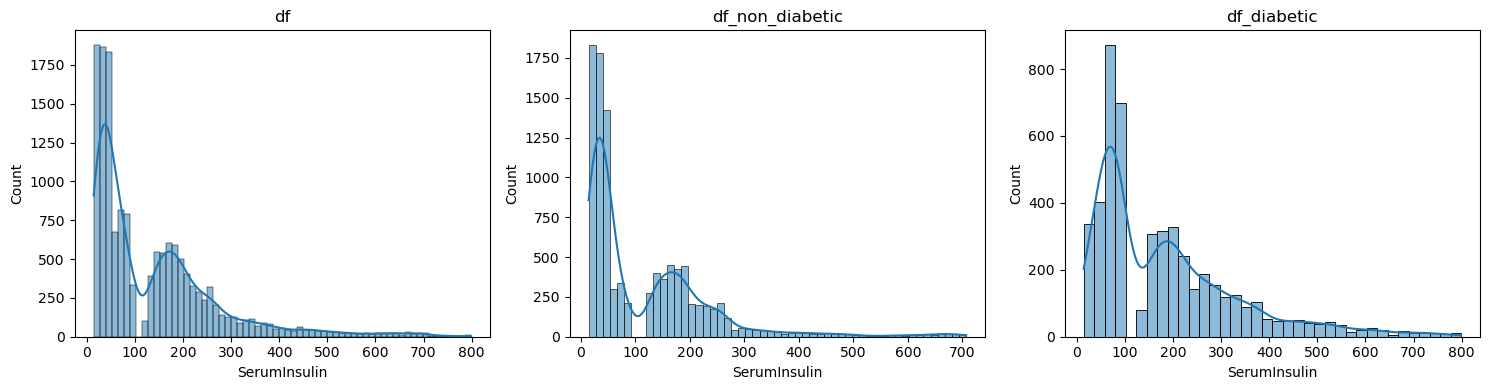

In [25]:
# Serum Insulin data distributions
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "SerumInsulin")

<Axes: xlabel='SerumInsulin', ylabel='Density'>

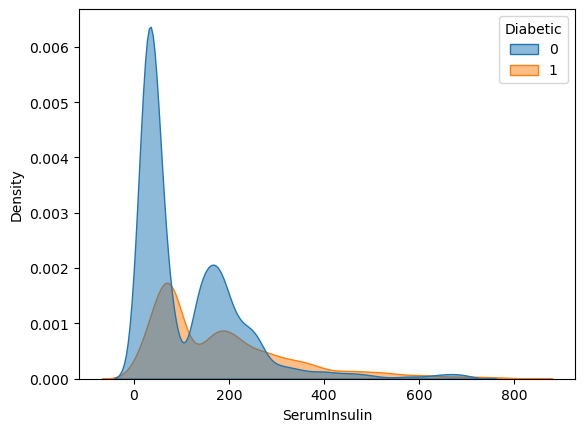

In [24]:
# Comparison of diabetic outcome vs. Serum Insulin
sns.kdeplot(data=df, x="SerumInsulin", hue="Diabetic", fill=True, alpha=0.5)

#### **Serum Insulin data observations**:


#### **Serum Insulin data implications**: 


---
### **BMI focus**

In [73]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "BMI")

------------------------------
Comparison of descriptive statistics for BMI:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,31.509646,30.057052,34.414834
std,9.759000,10.093520,8.325321
min,18.200512,18.200512,18.218614
25%,21.259887,20.624081,28.642144
50%,31.767940,28.323487,33.716060
75%,39.259692,39.123578,39.737780
max,56.034628,51.418626,56.034628


------------------------------
Comparison of data distributions for BMI:
------------------------------


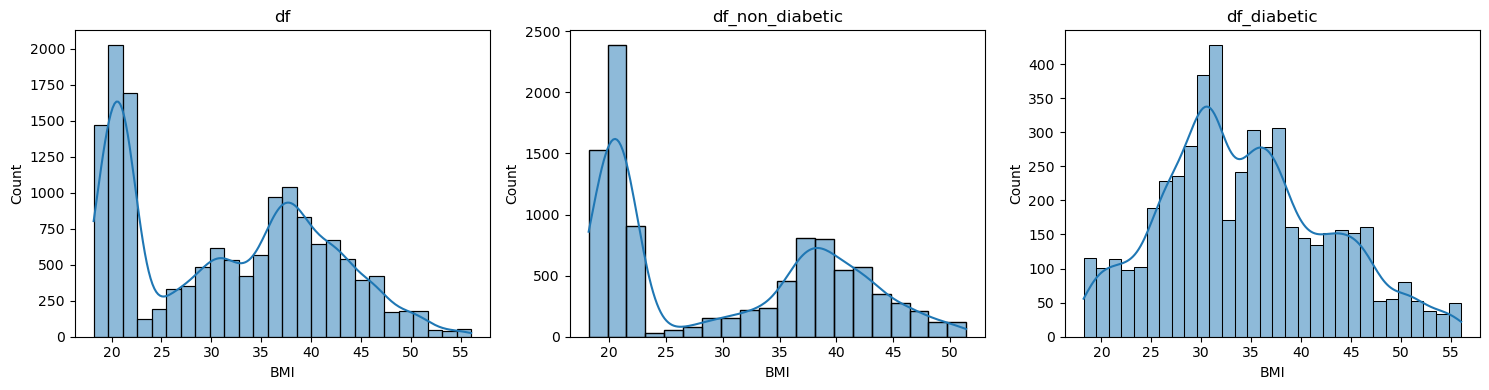

In [ ]:
# BMI data distributions
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "BMI")

<Axes: xlabel='BMI', ylabel='Density'>

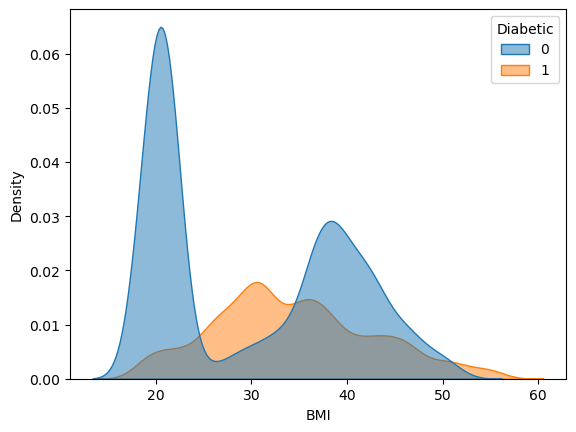

In [73]:
# Comparison of diabetic outcome vs. BMI
sns.kdeplot(data=df, x="BMI", hue="Diabetic", fill=True, alpha=0.5)

#### **BMI data observations**:


#### **BMI data implications**: 

---
### **Diabetes Pedigree focus**

In [63]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "DiabetesPedigree")

------------------------------
Comparison of descriptive statistics for DiabetesPedigree:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,0.398968,0.353457,0.489990
std,0.377944,0.331053,0.443775
min,0.078044,0.078044,0.078083
25%,0.137743,0.135498,0.143748
50%,0.200297,0.193486,0.222887
75%,0.616285,0.521379,0.774823
max,2.301594,2.215815,2.301594


------------------------------
Comparison of data distributions for DiabetesPedigree:
------------------------------


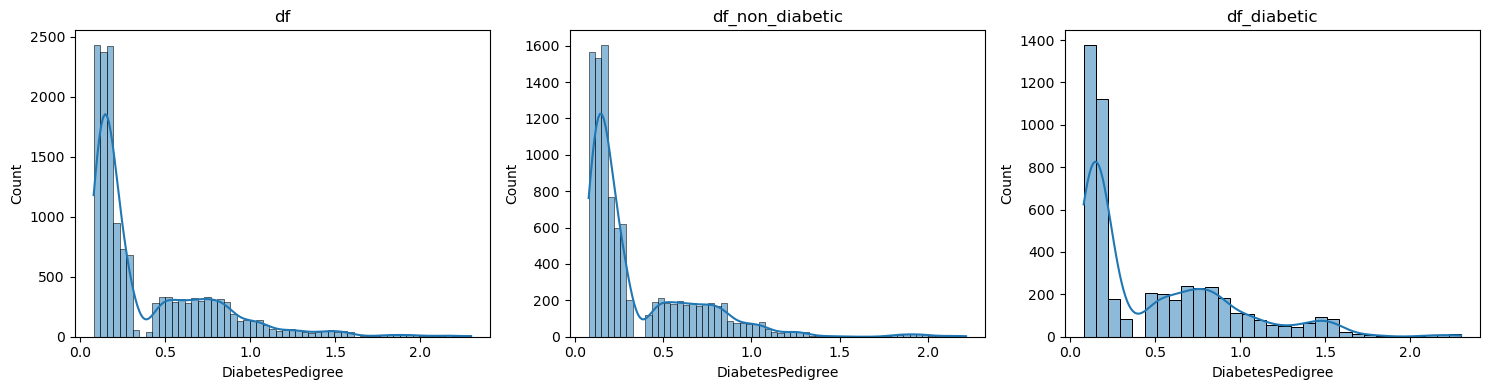

In [ ]:
# Diabetes pedigree data distributions
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "DiabetesPedigree")

<Axes: xlabel='DiabetesPedigree', ylabel='Density'>

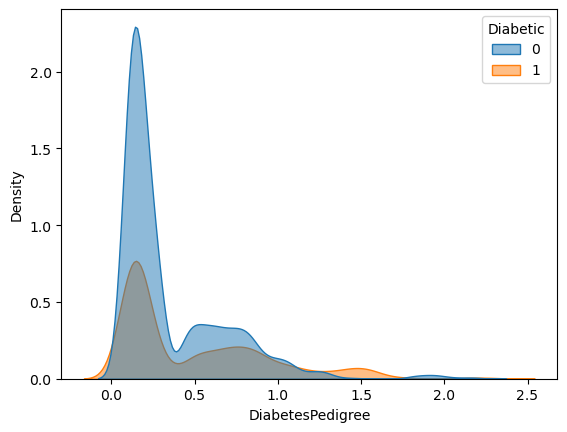

In [77]:
# Comparison of diabetic outcome vs. diabetes pedigree
sns.kdeplot(data=df, x="DiabetesPedigree", hue="Diabetic", fill=True, alpha=0.5)

#### **Diabetes Pedigree data observations**:


#### **Diabetes Pedigree data implications**: 

---
### **Age focus**

In [133]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "Age")

------------------------------
Comparison of descriptive statistics for Age:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,30.137733,27.209000,35.995200
std,12.089703,9.928463,13.780332
min,21.000000,21.000000,21.000000
25%,22.000000,22.000000,22.000000
50%,24.000000,24.000000,37.000000
75%,35.000000,26.000000,46.000000
max,77.000000,77.000000,67.000000


------------------------------
Comparison of data distributions for Age:
------------------------------


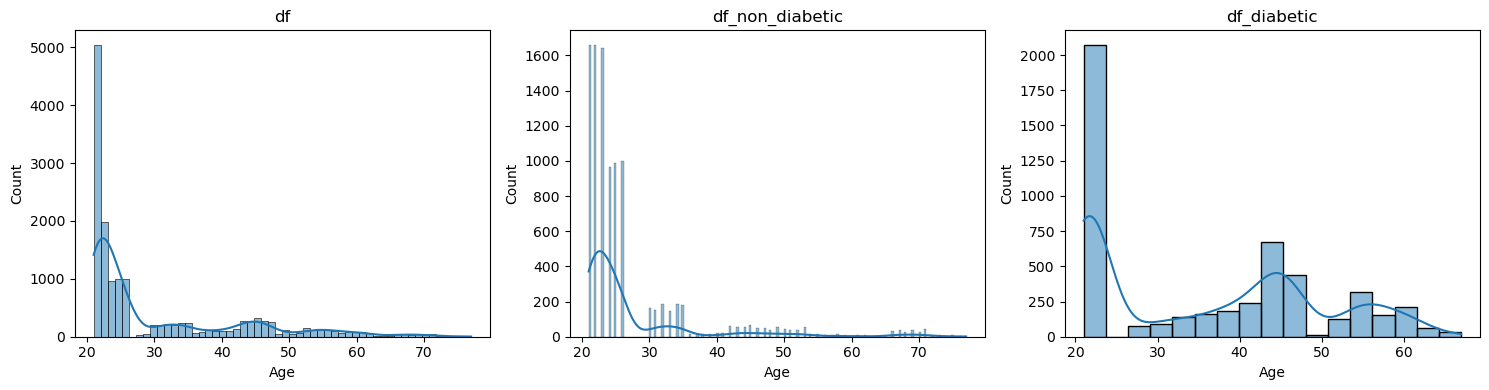

In [29]:
# Age data distributions
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "Age")

<Axes: xlabel='Age', ylabel='Density'>

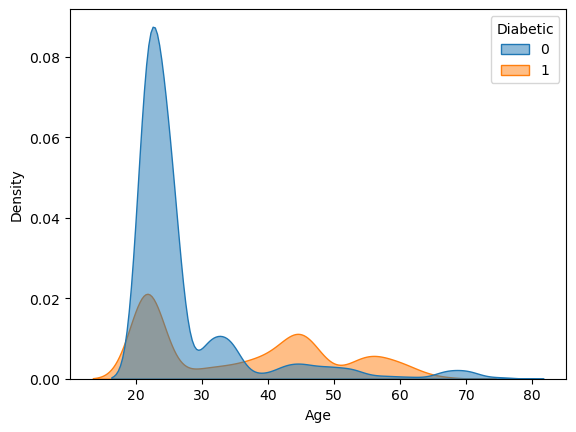

In [74]:
# Comparison of diabetic outcome vs. age
sns.kdeplot(data=df, x="Age", hue="Diabetic", fill=True, alpha=0.5)

#### **Age data observations**:


#### **Age data implications**: 

---
---

## **3.2 Further Bivariate analysis**

**This part is dedicated to:**
* Explore the relationships between the features other than the target;
* Understand if we can and should develop additional features.

<Axes: >

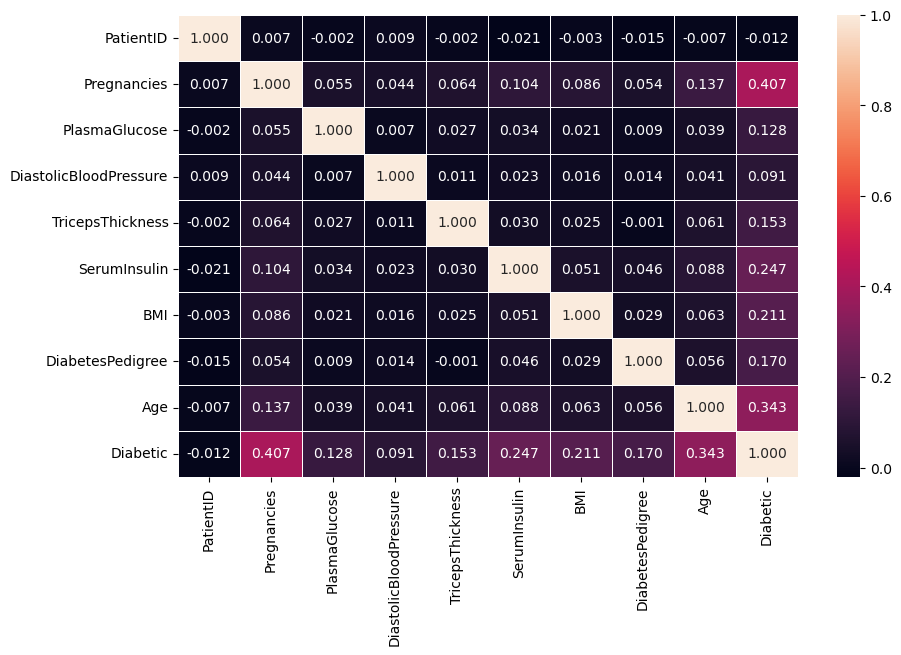

In [15]:
# Heatmap correlation matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidths=.5, ax=ax)

The positive correlation hints to us that the above present features have a positive relationship to our target (Diabetic), meaning that as they increase, the possibility of having a diabetes increases as well.

**Strongest to weakest diabetic relationships**: 
* Pregancies (~0.41)
* Age (~0.34)
* Seruminsulin (~0.25)
* BMI (~0.21)
* DiabetesPedigree (~0.17)
* Triceps Thickness (~0.15)
* PlasmaGlucose (~0.13)
* DiastolicBloodPressure (~0.09)

**Other relationships worth taking a closer look at**:
* Age vs. Pregnancies (~0.14)
* Pregnancies vs. Serum Insulin (~0.1)
* Age vs. Serum Insulin (~0.09)
* Pregnancies vs. BMI (~0.09)

---
### **Age vs. Pregnancies**

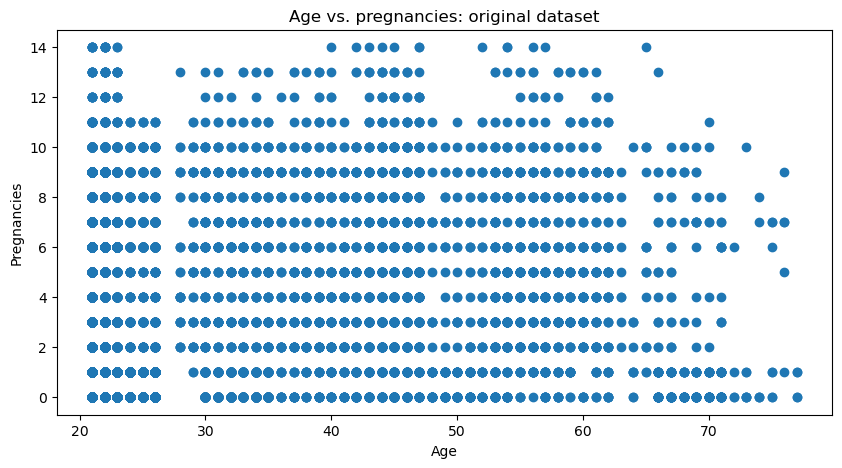

In [79]:
# Age vs. number of pregnancies comparison: original dataset
plt.figure(figsize=(10, 5))
plt.scatter(df.Age, df.Pregnancies)
plt.title("Age vs. pregnancies: original dataset")
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.show()

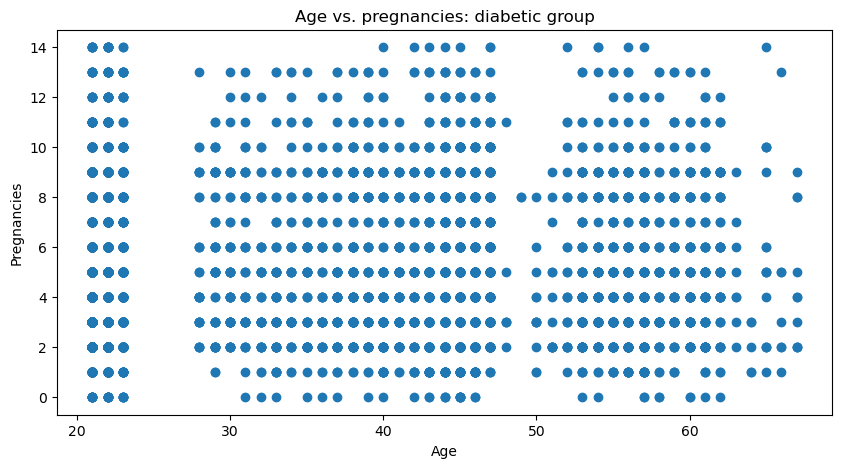

In [80]:
# Age vs. number of pregnancies comparison: diabetic group
plt.figure(figsize=(10, 5))
plt.scatter(df_diabetic.Age, df_diabetic.Pregnancies)
plt.title("Age vs. pregnancies: diabetic group")
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.show()

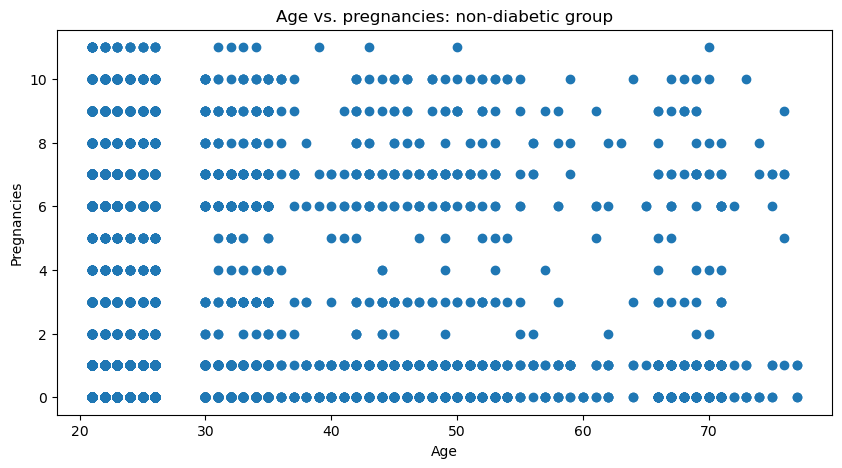

In [81]:
# Age vs. number of pregnancies comparison: non-diabetic group
plt.figure(figsize=(10, 5))
plt.scatter(df_non_diabetic.Age, df_non_diabetic.Pregnancies)
plt.title("Age vs. pregnancies: non-diabetic group")
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.show()

---
### **Pregnancies vs. Serum Insulin**

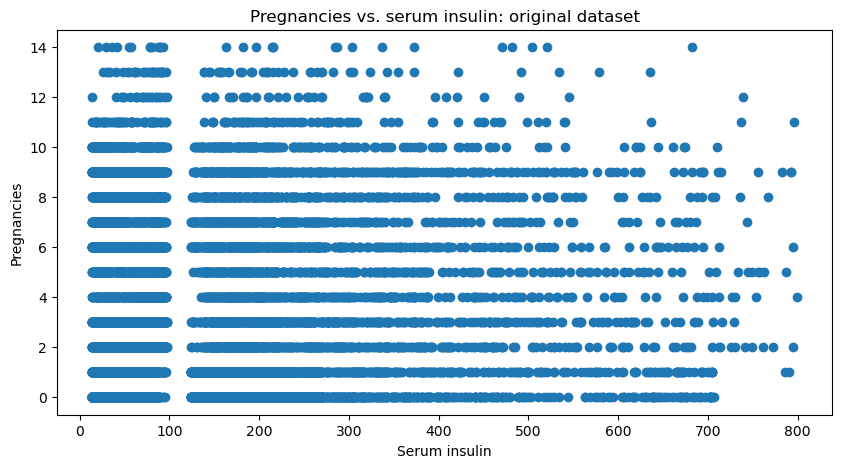

In [90]:
# Number of pregnancies vs. serum insulin: original dataset
plt.figure(figsize=(10, 5))
plt.scatter(df.SerumInsulin, df.Pregnancies)
plt.title("Pregnancies vs. serum insulin: original dataset")
plt.xlabel("Serum insulin")
plt.ylabel("Pregnancies")
plt.show()

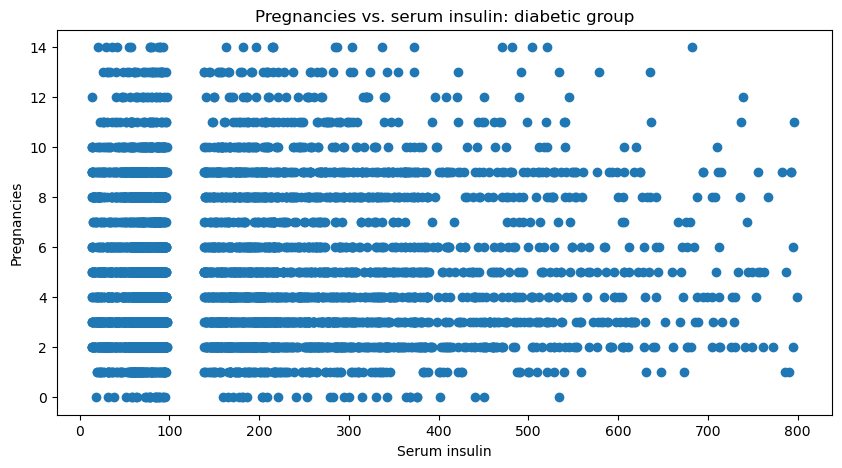

In [91]:
# Number of pregnancies vs. serum insulin: diabetic group
plt.figure(figsize=(10, 5))
plt.scatter(df_diabetic.SerumInsulin, df_diabetic.Pregnancies)
plt.title("Pregnancies vs. serum insulin: diabetic group")
plt.xlabel("Serum insulin")
plt.ylabel("Pregnancies")
plt.show()

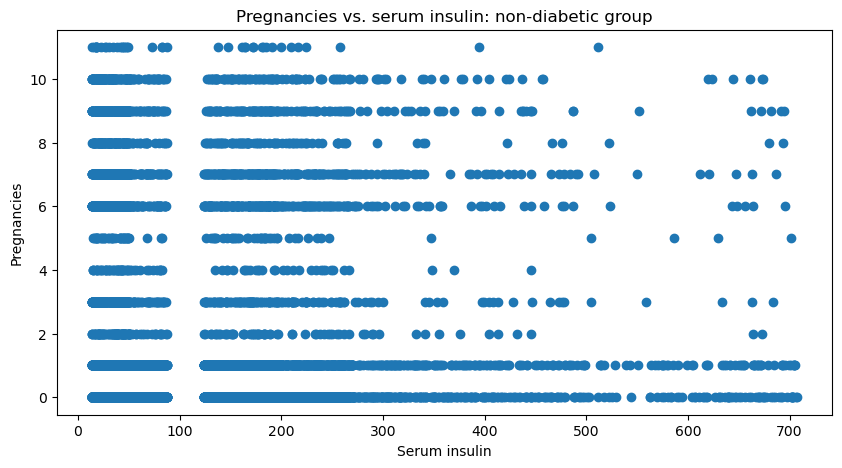

In [92]:
# Number of pregnancies vs. serum insulin: non-diabetic group
plt.figure(figsize=(10, 5))
plt.scatter(df_non_diabetic.SerumInsulin, df_non_diabetic.Pregnancies)
plt.title("Pregnancies vs. serum insulin: non-diabetic group")
plt.xlabel("Serum insulin")
plt.ylabel("Pregnancies")
plt.show()

---
### **Age vs. Serum Insulin**

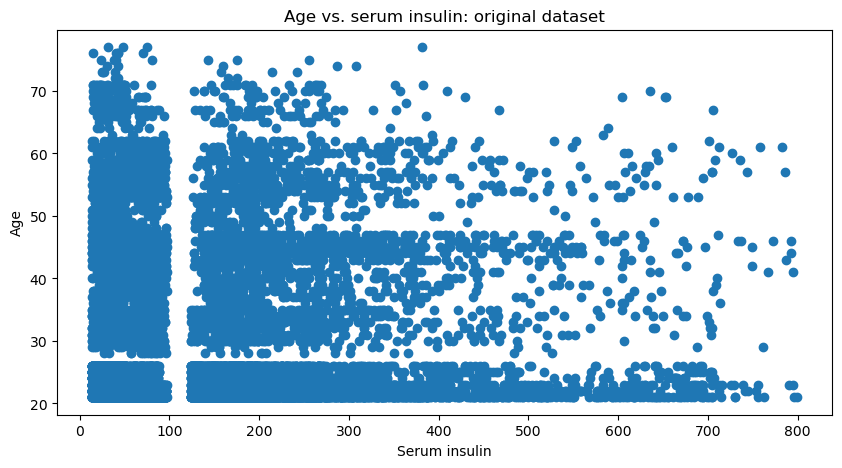

In [95]:
# Age vs. serum insulin: original dataset
plt.figure(figsize=(10, 5))
plt.scatter(df.SerumInsulin, df.Age)
plt.title("Age vs. serum insulin: original dataset")
plt.xlabel("Serum insulin")
plt.ylabel("Age")
plt.show()

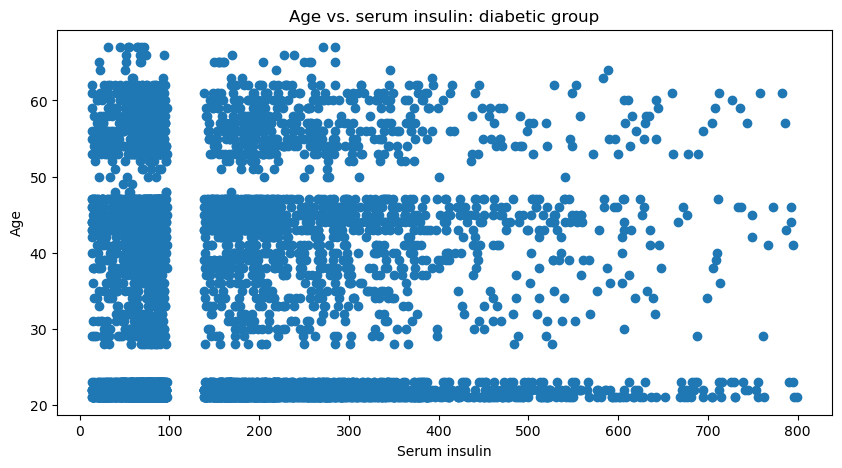

In [96]:
# Age vs. serum insulin: diabetic group
plt.figure(figsize=(10, 5))
plt.scatter(df_diabetic.SerumInsulin, df_diabetic.Age)
plt.title("Age vs. serum insulin: diabetic group")
plt.xlabel("Serum insulin")
plt.ylabel("Age")
plt.show()

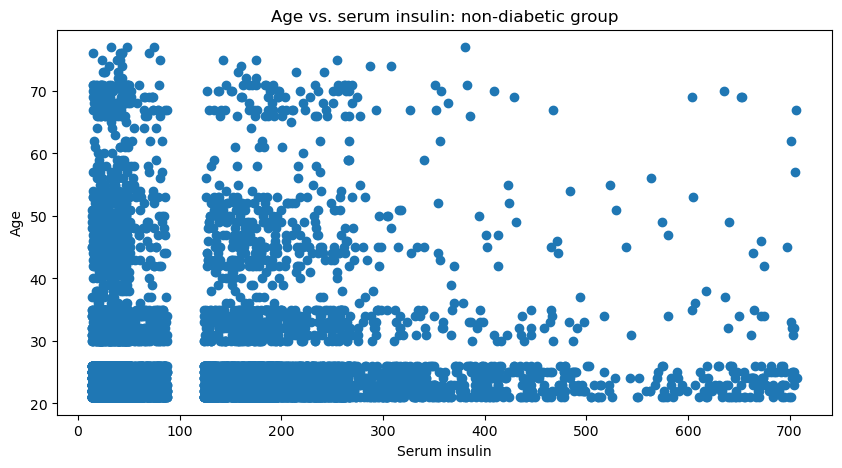

In [97]:
# Age vs. serum insulin: non-diabetic group
plt.figure(figsize=(10, 5))
plt.scatter(df_non_diabetic.SerumInsulin, df_non_diabetic.Age)
plt.title("Age vs. serum insulin: non-diabetic group")
plt.xlabel("Serum insulin")
plt.ylabel("Age")
plt.show()

---
### **Pregnancies vs. BMI**

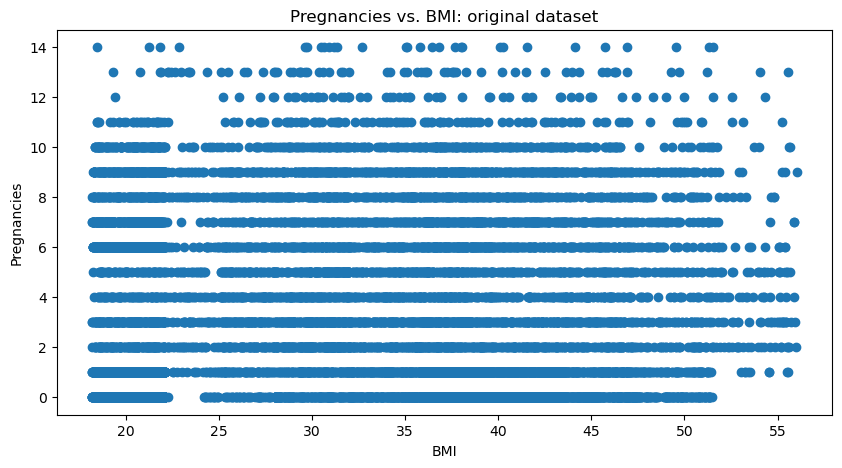

In [104]:
# Number of pregnancies vs. BMI: original dataset
plt.figure(figsize=(10, 5))
plt.scatter(df.BMI, df.Pregnancies)
plt.title("Pregnancies vs. BMI: original dataset")
plt.xlabel("BMI")
plt.ylabel("Pregnancies")
plt.show()

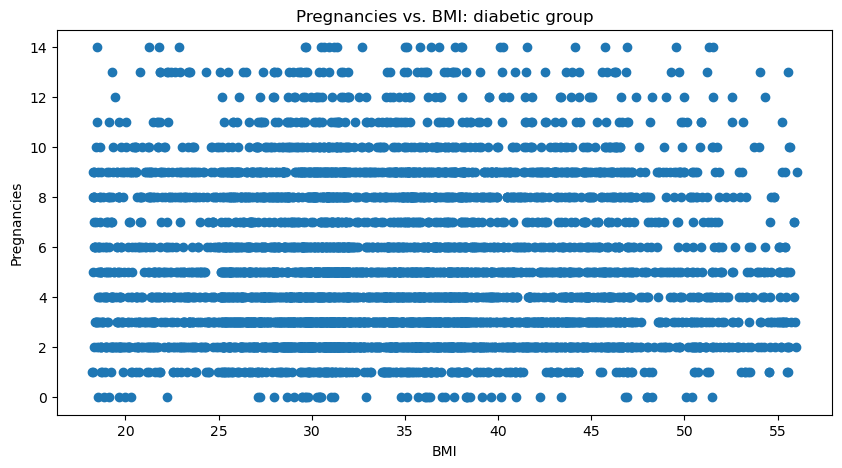

In [106]:
# Number of pregnancies vs. BMI: diabetic group
plt.figure(figsize=(10, 5))
plt.scatter(df_diabetic.BMI, df_diabetic.Pregnancies)
plt.title("Pregnancies vs. BMI: diabetic group")
plt.xlabel("BMI")
plt.ylabel("Pregnancies")
plt.show()

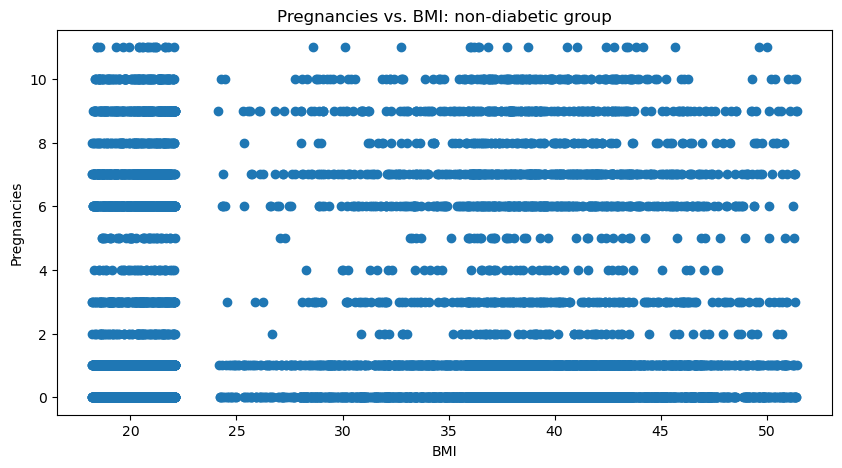

In [107]:
# Number of pregnancies vs. BMI: non-diabetic group
plt.figure(figsize=(10, 5))
plt.scatter(df_non_diabetic.BMI, df_non_diabetic.Pregnancies)
plt.title("Pregnancies vs. BMI: non-diabetic group")
plt.xlabel("BMI")
plt.ylabel("Pregnancies")
plt.show()

---

#### **Further bivariate analysis data observations**:
* Age vs. Pregnancies (~0.14):
    *
* Pregnancies vs. Serum Insulin (~0.1):
    *
* Age vs. Serum Insulin (~0.09):
    *
* Pregnancies vs. BMI (~0.09):
    *


#### **Further bivariate analysis data implications**: 
*

---
---

## **3.3 Outliers detection**

**This part is dedicated to:**
* Detect the presence of potential outliers;
* Decide on how to treat the outliers present in the dataset.

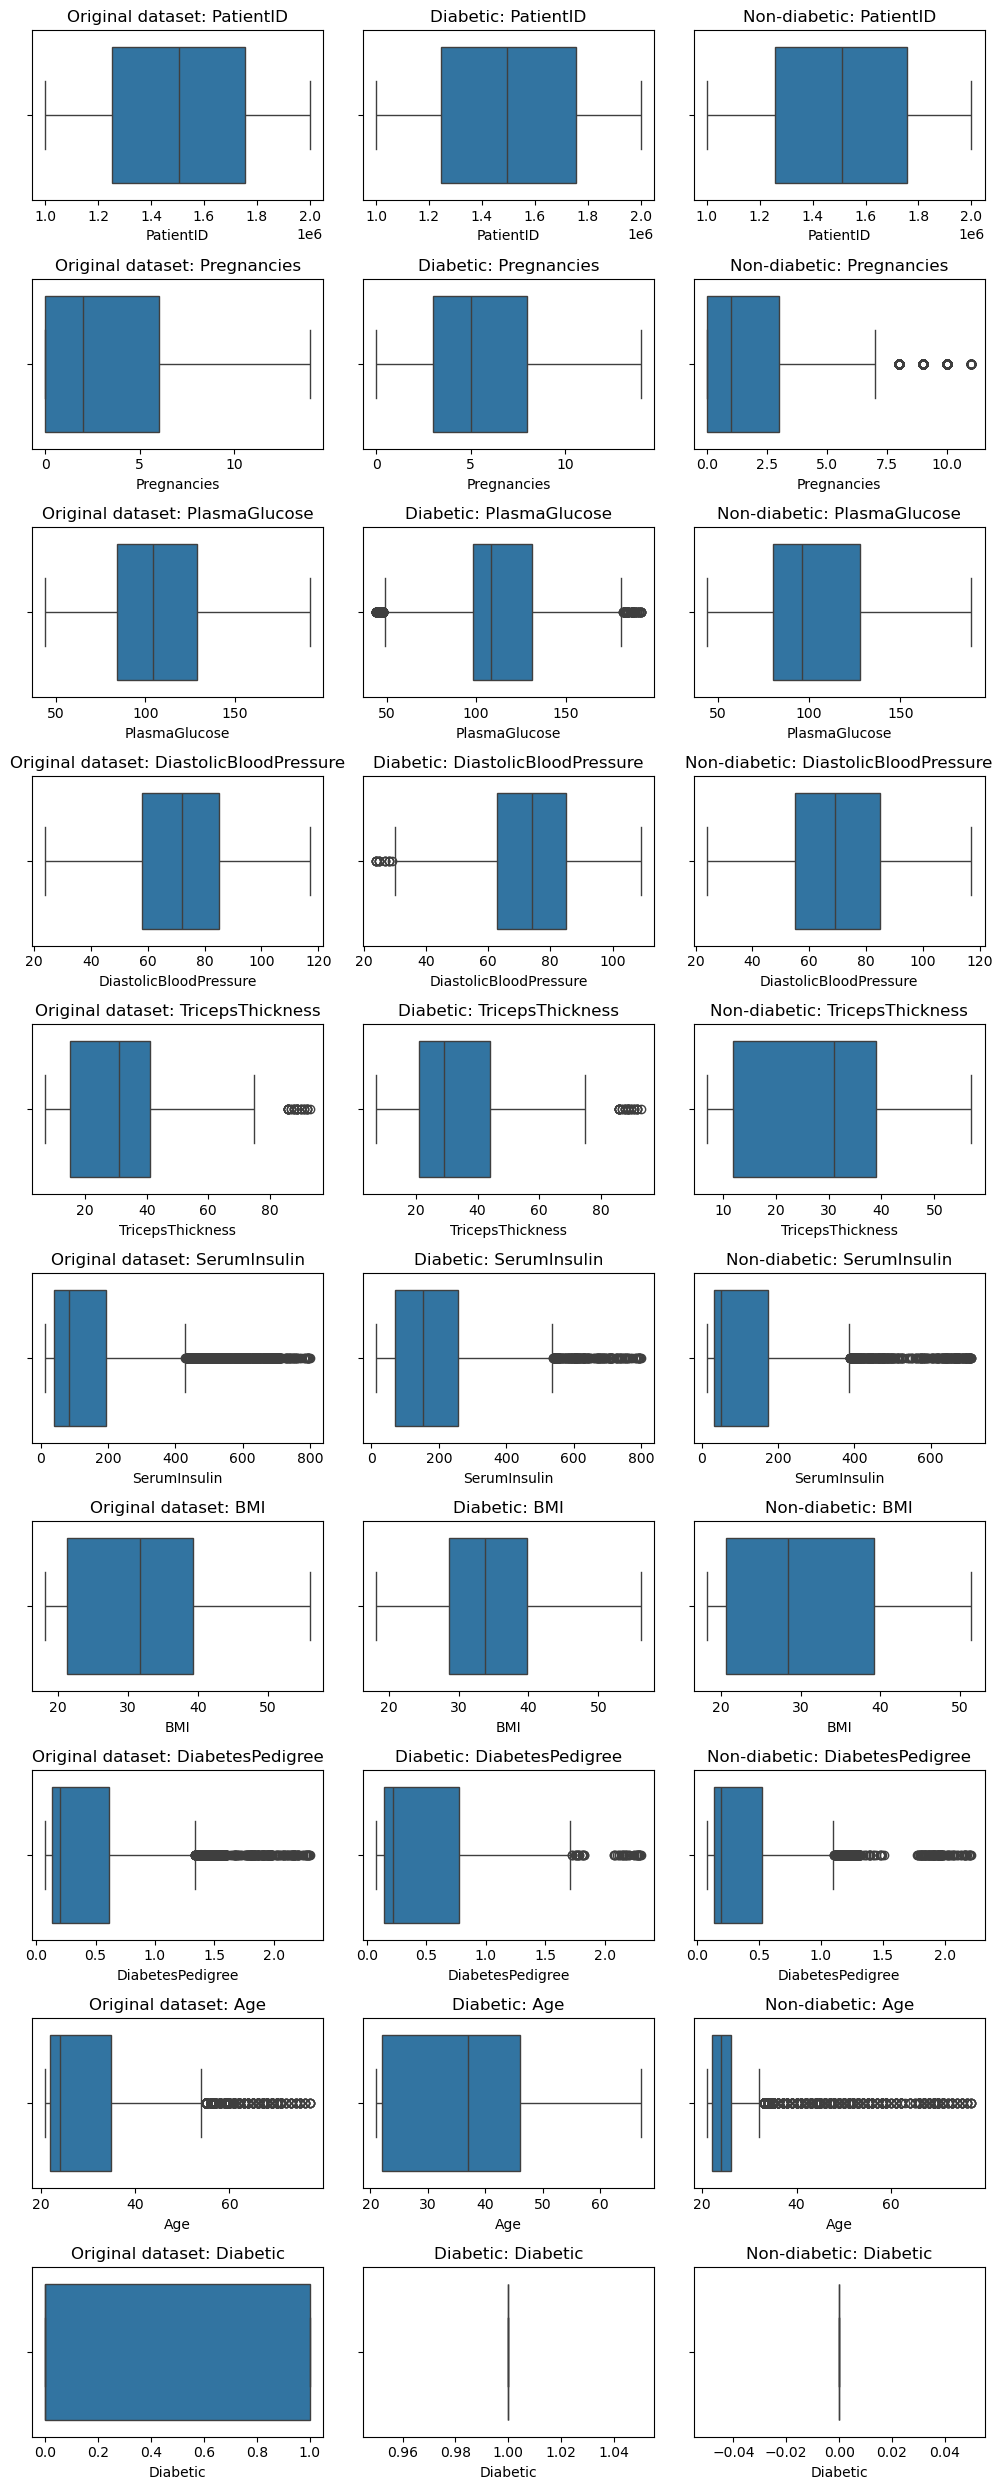

In [70]:
# Data distributions across the columns for the whole dataframe vs diabetic & non-diabetic groups
columns = df.columns
nb_rows = len(columns)

fig, axes = plt.subplots(ncols=3, nrows=nb_rows, figsize=(10, 25))

for i, col in enumerate(columns):
    
    sns.boxplot(data=df, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original dataset: {col}")
    
    sns.boxplot(data=df_diabetic, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f"Diabetic: {col}")
    
    sns.boxplot(data=df_non_diabetic, x=col, ax=axes[i, 2])
    axes[i, 2].set_title(f"Non-diabetic: {col}")

plt.tight_layout()
plt.show()

---
# **4. FEATURE ENGINEERING**
---

Goals : 
* Feature selection
* Data normalization
    * Repeated values - time to act now
    * Continuous values binning ?
    * class imbalances - SMOTE ?
* Outliers treatment
    * cap the outliers to min and max values, but be smart about it like titanic example - winsorization ?
* Data encoding
* False positive vs false negative? - rather positive, because of the context, but needs to be more argumented
    * Using class weights may lead to have slightly more false positives, but that's okay in this context.

---
# **5. MODELS EVALUATION**
---